In [1]:
from glob import glob 
import os
import numpy as np
import csv
import matplotlib.pyplot as plt
import tikzplotlib
import pandas as pd

In [2]:
folder = "../data/Results_all_new/Results_all/"
experiments = glob(folder + "*")
print(experiments)
exp_elmts = glob(experiments[0] + "/*")
print(exp_elmts)
exp_elmts = glob(exp_elmts[0] + "/*")
print(exp_elmts)
metrics = glob(exp_elmts[0] + "/*")
print(metrics)

['../data/Results_all_new/Results_all/Experiment2_new', '../data/Results_all_new/Results_all/Experiment4_new', '../data/Results_all_new/Results_all/Experiment3_new', '../data/Results_all_new/Results_all/Experiment1_new']
['../data/Results_all_new/Results_all/Experiment2_new/CNN', '../data/Results_all_new/Results_all/Experiment2_new/ViT']
['../data/Results_all_new/Results_all/Experiment2_new/CNN/IQ', '../data/Results_all_new/Results_all/Experiment2_new/CNN/STFT', '../data/Results_all_new/Results_all/Experiment2_new/CNN/FFT']
['../data/Results_all_new/Results_all/Experiment2_new/CNN/IQ/f1.csv', '../data/Results_all_new/Results_all/Experiment2_new/CNN/IQ/t2t.csv', '../data/Results_all_new/Results_all/Experiment2_new/CNN/IQ/trapz.csv', '../data/Results_all_new/Results_all/Experiment2_new/CNN/IQ/0.1.csv', '../data/Results_all_new/Results_all/Experiment2_new/CNN/IQ/10.csv', '../data/Results_all_new/Results_all/Experiment2_new/CNN/IQ/1.csv', '../data/Results_all_new/Results_all/Experiment2_ne

In [3]:
def read_metric_file(metric_file):
    # Read one metric file
    with open(metric_file) as csvfile:
        reader = csv.DictReader(csvfile)
        # populate the steps matric
        steps = []
        corrupted_runs = []
        for step, row in enumerate(reader):
            keys = list(row.keys())
            steps.append([])
            # compile the correct value for each step
            for run_nb in range(int(len(row)/3)):
                # print(keys[1+3*i])
                if len(row[keys[1+3*run_nb]]) == 0:
                    # This run number it corrupted
                    if not run_nb in corrupted_runs:
                        # print("Corrupted run number:", run_nb)
                        corrupted_runs.append(run_nb)
                    steps[step].append(0)
                else :
                    steps[step].append(float(row[keys[1+3*run_nb]]))

        metric_values = np.array(steps)
    # print(np.shape(metric_values))
    kept_runs = [i for i in range(len(metric_values[0])) if i not in corrupted_runs]
    metric_values = metric_values[:, kept_runs]
    # print(metric_values.shape)
    return metric_values

In [4]:
choosen_metric = "F1 score on test data"
def read_global_log_file(metric_file):
    df = pd.read_csv(metric_file, skiprows=1, index_col=False)
    df.columns = ["name", "value", "epoch"]
    df = df[df["name"] == choosen_metric]
    return df["value"].to_numpy()

print(read_global_log_file("../data/Results_all_new/Results_all/Experiment3_new/9additional/Multisampleruns/Multisampleruns/N-7-hm32wthm/log_metrics.csv"))

[0.62156702 0.62851456 0.64337655 0.61685232 0.60155343 0.64047636
 0.67240058 0.66388956 0.62133494 0.63164603 0.63668873 0.70427522
 0.64213383 0.65582157 0.69619221 0.64044904 0.71350064 0.65169841
 0.66061285 0.67635626 0.71845385 0.72112956 0.71805787 0.67635574
 0.68344472]


In [5]:
all_results = {}
folder = "../data/Results_all_new/Results_all/"
experiments = glob(folder + "*")
prefix = len(folder)
# They are 4 experiments
for exp in experiments:
    key1 = exp[prefix:]
    all_results[key1] = {}
    # Each experiment has comparaison elements
    for exp_elmt in glob(exp+"/*"):
        prefix2 = len(exp)+1
        key2 = exp_elmt[prefix2:]
        all_results[key1][key2] = {}
        # Each comparaison element has metric files or more sub-elements
        for exp_elmt2 in glob(exp_elmt+"/*"):
            prefix3 = len(exp_elmt)+1
            key3 = exp_elmt2[prefix3:]
            all_results[key1][key2][key3] = {}
            if exp_elmt2.endswith('.csv'):
                metric_values = read_metric_file(exp_elmt2)
                all_results[key1][key2][key3] = metric_values
            else :
                # Each sub-element has metric files or more sub-sub-elements
                for exp_elmt3 in glob(exp_elmt2+"/*"):
                    prefix4 = len(exp_elmt2)+1
                    key4 = exp_elmt3[prefix4:]
                    all_results[key1][key2][key3][key4] = {}
                    if exp_elmt3.endswith('.csv'):
                        metric_values = read_metric_file(exp_elmt3)
                        all_results[key1][key2][key3][key4] = metric_values
                    else :
                    # Each sub-sub-element has metric files or more sub-sub-sub-elements                    
                        for exp_elmt4 in glob(exp_elmt3+"/*"):
                            prefix5 = len(exp_elmt3)+1
                            key5 = exp_elmt4[prefix5:]
                            all_results[key1][key2][key3][key4][key5] = {}
                            if exp_elmt4.endswith('.csv'):
                                metric_values = read_metric_file(exp_elmt4)
                                all_results[key1][key2][key3][key4][key5] = metric_values
                            else :
                                # At this point it is only experiment3 it is only usless folders in addition only csv left
                                for exp_elmt5 in glob(exp_elmt4+"/*"):
                                    prefix6 = len(exp_elmt4)+1
                                    key6 = exp_elmt5[prefix6:]
                                    # print(key1, key2, key3, key4, key5, key6)
                                    if exp_elmt5.endswith('.csv'):
                                        if key6 == "log_metrics.csv" :
                                            metric_values = read_global_log_file(exp_elmt5)
                                            all_results[key1][key2][key3][key4][key5][key6] = metric_values
                                            # print(key1, key2, key3, key4, key5, key6)
                                        else :
                                            metric_values = read_metric_file(exp_elmt5)
                                            all_results[key1][key2][key3][key4][key5][key6] = metric_values
                                    else :
                                        print("DID NOT READ FOLLOWING FILE:", exp_elmt5)
                                    


In [6]:
# rework of certain parts to compile 9additional samples correctly.
names = all_results["Experiment3_new"]["9additional"]["Multisampleruns"]["Multisampleruns"].keys()
result_array = [[], [], [], []]
for n in names:
    metric_values = all_results["Experiment3_new"]["9additional"]["Multisampleruns"]["Multisampleruns"][n]["log_metrics.csv"]
    # delete them
    del all_results["Experiment3_new"]["9additional"]["Multisampleruns"]["Multisampleruns"][n]["log_metrics.csv"]
    for i in range(1, 21):
        if n.startswith("N-"+str(i)+"-"):
            result_array[(i-1)//5].append(metric_values)
result_array = np.array(result_array)
all_results["Experiment3_new"]["9additional"]["diff_pos"] = {}
all_results["Experiment3_new"]["9additional"]["diff_pos"]["CNN"] = {}
all_results["Experiment3_new"]["9additional"]["diff_pos"]["ViT"] = {}
all_results["Experiment3_new"]["9additional"]["diff_pos"]["CNN"]["IQ.f1.csv"] = result_array[3]
all_results["Experiment3_new"]["9additional"]["diff_pos"]["ViT"]["IQ.f1.csv"] = result_array[2]
all_results["Experiment3_new"]["9additional"]["diff_pos"]["CNN"]["STFT.f1.csv"] = result_array[0]
all_results["Experiment3_new"]["9additional"]["diff_pos"]["ViT"]["STFT.f1.csv"] = result_array[1]

In [7]:
print(all_results)

{'Experiment2_new': {'CNN': {'IQ': {'f1.csv': array([[0.54491266, 0.57204766, 0.6029241 , 0.51017488, 0.52178585,
        0.56983459, 0.55303468, 0.55046511],
       [0.55888628, 0.4749138 , 0.59573209, 0.45553101, 0.54949112,
        0.52951867, 0.58378614, 0.52211667],
       [0.55204123, 0.45783191, 0.58696419, 0.45942989, 0.52127191,
        0.53185624, 0.57623317, 0.56927837],
       [0.50433447, 0.52883777, 0.58956094, 0.45103413, 0.54347436,
        0.54930002, 0.5882933 , 0.55198694],
       [0.512774  , 0.50985224, 0.56894201, 0.50914874, 0.52194242,
        0.52798196, 0.54664853, 0.53716883],
       [0.48609688, 0.46723794, 0.54850333, 0.45766126, 0.53276488,
        0.56666281, 0.59995994, 0.5161644 ],
       [0.52467374, 0.52331417, 0.56127769, 0.53575261, 0.53544038,
        0.54150854, 0.58385507, 0.53991619],
       [0.53855477, 0.47938926, 0.55308011, 0.47751222, 0.53430173,
        0.58092616, 0.60784811, 0.58093306],
       [0.44911872, 0.53713991, 0.56506856, 0.4937

In [8]:
import matplotlib as mpl
import seaborn as sns
import pandas as pd
from scipy.stats import sem


# Enable LaTeX formatting
mpl.rcParams['text.usetex'] = True
# Set the global font to be Times New Roman, size 11
mpl.rc('font', family='Times New Roman', size=11)

# # Set style
# sns.axes_style("darkgrid")
# sns.set_style("whitegrid")

# # Set font scale
# sns.set_context("paper")
cols = "tab10"

# # Set color palette
# sns.set_palette(cols)


# Set font family
# sns.set(font="Times New Roman")

# Comparaison of Input types

dict_keys(['Experiment2_new', 'Experiment4_new', 'Experiment3_new', 'Experiment1_new'])
dict_keys(['complex', 'imag', 'abs', 'real'])
dict_keys(['f1.csv', 't2t.csv', 'trapz.csv', '0.1.csv', '10.csv', '1.csv', 'acc.csv', 'kmeans.csv'])
['complex', 'imag', 'abs', 'real']
f1.csv
min_run_nb 4


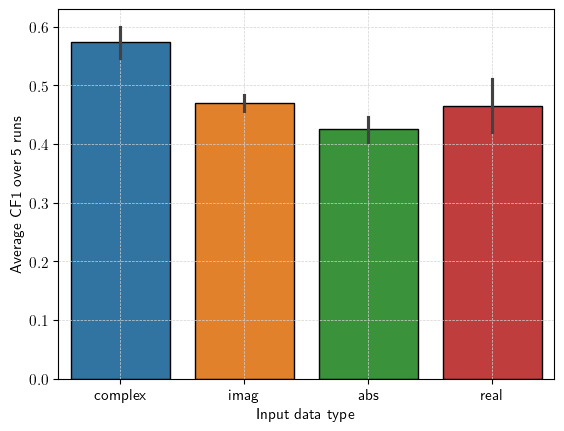

In [9]:
# Select wanted comobination
exp_keys = all_results.keys()
print(exp_keys)
selected_experiment = all_results["Experiment1_new"]
keys = selected_experiment.keys()
print(keys)
metrics = all_results["Experiment1_new"][list(keys)[0]].keys()
print(metrics)

# Make dataframe of it
midx = pd.MultiIndex.from_product([list(keys), list(metrics)])
df = pd.DataFrame.from_dict(selected_experiment)

# Select branches to include in the plot
selected_branches = list(keys)
print(selected_branches)
selected_subbranch = "f1.csv"
print(selected_subbranch)

# Only keep the max values for each run
max_values = df[selected_branches].loc[selected_subbranch].apply(lambda x: np.max(x, axis=0))

# keep the minimal number of runs
min_run_nb = min([len(max_values[key]) for key in max_values.index])
print("min_run_nb", min_run_nb)
max_values = max_values.apply(lambda x: x[:min_run_nb])

# Format correctly
correct_frame = pd.DataFrame.from_dict(dict(zip(max_values.index, max_values.values)))

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot finally
ax = sns.barplot(data=correct_frame, errorbar="sd", edgecolor="black", palette=cols)
# ax = sns.barplot(data=correct_frame)
# sns.despine()
plt.gca().set_facecolor('none')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.5)


ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')

ax.set_ylabel('Average CF1 over 5 runs')
ax.set_xlabel('Input data type')

sns.set_style("whitegrid")
sns.set_context("paper")

params = [
    "tick align=outside",
    "xtick pos=lower",
    "ytick pos=left",
    "xmajorticks=true",
    "ymajorticks=true",
]

tikzplotlib.save('plot.tex', extra_axis_parameters =params)

plt.show()

In [10]:
def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

# Acrface

dict_keys(['Experiment2_new', 'Experiment4_new', 'Experiment3_new', 'Experiment1_new'])
dict_keys(['ce', 'arc'])
dict_keys(['CNN', 'ViT'])
min_run_nb 5
0    Crossentropy
1    Crossentropy
2         Arcface
3         Arcface
dtype: object
0    CNN
1    ViT
2    CNN
3    ViT
dtype: object
           name       mean       std Architectures
0  Crossentropy  14.463303  1.724570           CNN
1  Crossentropy  19.788035  0.768164           ViT
2       Arcface  19.684893  1.633011           CNN
3       Arcface  21.075257  1.128059           ViT


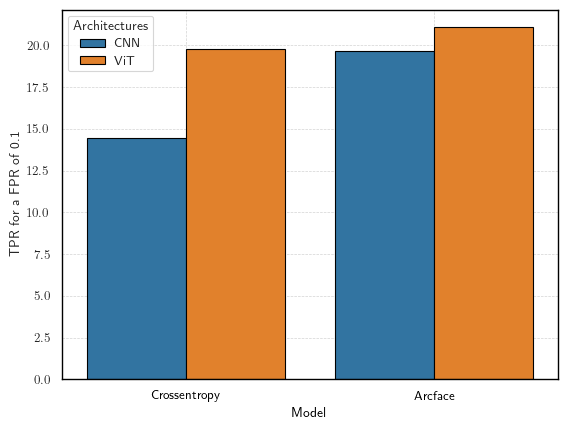

In [11]:
# Select wanted comobination
exp_keys = all_results.keys()
print(exp_keys)
selected_experiment = all_results["Experiment4_new"]
keys = selected_experiment.keys()
print(keys)
compared = all_results["Experiment4_new"][list(keys)[0]].keys()
print(compared)


flat_dict = pd.json_normalize(all_results["Experiment4_new"], sep=".").to_dict(orient='records')

# Make dataframe of it
df = pd.DataFrame.from_dict(flat_dict)

# Select branches to include in the plot
# selected_branches = ["ce.CNN.IQ.f1.csv", "ce.CNN.STFT.f1.csv", "ce.ViT.IQ.f1.csv", "ce.ViT.STFT.f1.csv",
#                      "arc.CNN.IQ.f1.csv", "arc.CNN.STFT.f1.csv", "arc.ViT.IQ.f1.csv", "arc.ViT.STFT.f1.csv"]

m = "0.1.csv"

selected_branches = ["ce.CNN.IQ", "ce.ViT.IQ",
                     "arc.CNN.IQ", "arc.ViT.IQ"]

selected_branches = list(map(lambda x: x+"."+m, selected_branches))

# Only keep the max values for each run
max_values = df[selected_branches].loc[0].apply(lambda x: x.max(axis=0))
# Keep the minimal number of runs
min_run_nb = min([len(max_values[key]) for key in max_values.index])
print("min_run_nb", min_run_nb)
max_values = max_values.apply(lambda x: x[:min_run_nb])

mean_values = max_values.apply(lambda x: np.mean(x))  # 95% confidence interval
conf_intervals = max_values.apply(lambda x: sem(x) * 1.96)  # 95% confidence interval
names = pd.Series(["Crossentropy", "Crossentropy", "Arcface", "Arcface"])
print(names)

groups = pd.Series(["CNN", "ViT", "CNN", "ViT"])
print(groups)

runs = range(min_run_nb)
df = pd.concat([names, mean_values.reset_index(drop=True), conf_intervals.reset_index(drop=True), groups], axis=1)

df.columns=['name', 'mean', 'std', 'Architectures']
print(df)



# midx = pd.MultiIndex.from_product([groups, max_values.index, runs])
# print(midx)

# Format correctly
correct_frame = pd.DataFrame.from_dict(dict(zip(max_values.index, max_values.values)))
# correct_frame = correct_frame.T
# correct_frame["group"] = pd.Series(groups, index=correct_frame.index)
# correct_frame = correct_frame.T
# print(correct_frame)


# Plot finally
fig = plt.figure()
ax = fig.add_subplot(111)
ax = sns.barplot(data=df, x="name", y="mean", errorbar="sd", hue="Architectures", edgecolor="black", palette=cols)

plt.gca().set_facecolor('none')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.5)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.set_ylabel('TPR for a FPR of 0.1%')
ax.set_xlabel('Model')
sns.set_style("whitegrid")
sns.set_context("paper")
params = [
    "tick align=outside",
    "xtick pos=lower",
    "ytick pos=left",
    "xmajorticks=true",
    "ymajorticks=true",
]

tikzplotlib_fix_ncols(plt.gcf())
tikzplotlib.save('plot.tex', extra_axis_parameters =params)
plt.show()

# All Architecture

dict_keys(['Experiment2_new', 'Experiment4_new', 'Experiment3_new', 'Experiment1_new'])
dict_keys(['CNN', 'ViT'])
dict_keys(['IQ', 'STFT', 'FFT'])
min_run_nb 3
0      IQ
1     FFT
2    STFT
3      IQ
4     FFT
5    STFT
dtype: object
0    CNN
1    CNN
2    CNN
3    ViT
4    ViT
5    ViT
dtype: object
   name      mean       std Architectures
0    IQ  0.580676  0.030725           CNN
1   FFT  0.507385  0.027745           CNN
2  STFT  0.655718  0.005064           CNN
3    IQ  0.610519  0.016794           ViT
4   FFT  0.415895  0.016534           ViT
5  STFT  0.669305  0.034815           ViT


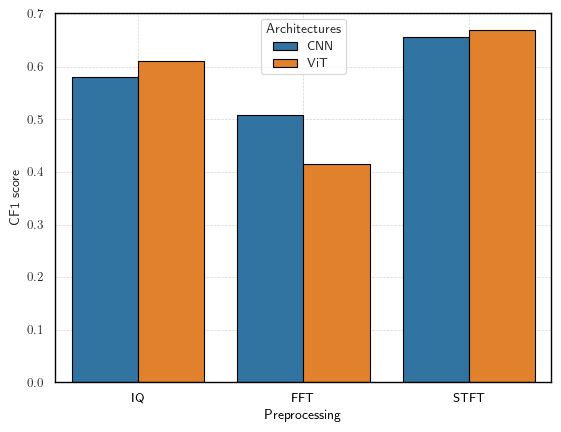

In [12]:
# Select wanted comobination
exp_keys = all_results.keys()
print(exp_keys)
selected_experiment = all_results["Experiment2_new"]
keys = selected_experiment.keys()
print(keys)
compared = all_results["Experiment2_new"][list(keys)[0]].keys()
print(compared)


flat_dict = pd.json_normalize(all_results["Experiment2_new"], sep=".").to_dict(orient='records')

# Make dataframe of it
df = pd.DataFrame.from_dict(flat_dict)

m = "f1.csv"
selected_branches = ["CNN.IQ", "CNN.FFT", "CNN.STFT",
                     "ViT.IQ", "ViT.FFT", "ViT.STFT"]

selected_branches = list(map(lambda x: x+"."+m, selected_branches))

# Only keep the max values for each run
max_values = df[selected_branches].loc[0].apply(lambda x: x.max(axis=0))
# Keep the minimal number of runs
min_run_nb = min([len(max_values[key]) for key in max_values.index])
print("min_run_nb", min_run_nb)
max_values = max_values.apply(lambda x: x[:min_run_nb])

mean_values = max_values.apply(lambda x: np.mean(x))  # 95% confidence interval
conf_intervals = max_values.apply(lambda x: sem(x) * 1.96)  # 95% confidence interval
names = pd.Series(["IQ", "FFT", "STFT", "IQ", "FFT", "STFT"])
print(names)

groups = pd.Series(["CNN", "CNN", "CNN", "ViT", "ViT", "ViT"])
print(groups)

runs = range(min_run_nb)
df = pd.concat([names, mean_values.reset_index(drop=True), conf_intervals.reset_index(drop=True), groups], axis=1)

df.columns=['name', 'mean', 'std', 'Architectures']
print(df)



# midx = pd.MultiIndex.from_product([groups, max_values.index, runs])
# print(midx)

# Format correctly
correct_frame = pd.DataFrame.from_dict(dict(zip(max_values.index, max_values.values)))
# correct_frame = correct_frame.T
# correct_frame["group"] = pd.Series(groups, index=correct_frame.index)
# correct_frame = correct_frame.T
# print(correct_frame)


# Plot finally
fig = plt.figure()
ax = fig.add_subplot(111)
ax = sns.barplot(data=df, x="name", y="mean", errorbar="sd", hue="Architectures", edgecolor="black", palette=cols)

plt.gca().set_facecolor('none')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.5)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.set_ylabel('CF1 score')
ax.set_xlabel('Preprocessing')
sns.set_style("whitegrid")
sns.set_context("paper")
params = [
    "tick align=outside",
    "xtick pos=lower",
    "ytick pos=left",
    "xmajorticks=true",
    "ymajorticks=true",
]

tikzplotlib_fix_ncols(plt.gcf())
tikzplotlib.save('plot.tex', extra_axis_parameters =params)
plt.show()

# Multi samples


In [22]:
# Select wanted comobination
exp_keys = all_results.keys()
print(exp_keys)
selected_experiment = all_results["Experiment3_new"]
keys = selected_experiment.keys()
print(keys)
compared = all_results["Experiment3_new"][list(keys)[0]].keys()
print(compared)


flat_dict = pd.json_normalize(all_results, sep=".").to_dict(orient='records')

# Make dataframe of it
df = pd.DataFrame.from_dict(flat_dict)

m = "f1.csv"
selected_branches = [
    'Experiment2_new.CNN.IQ', 'Experiment2_new.ViT.IQ',
                     'Experiment3_new.2additional.same_pos.CNN.IQ', 'Experiment3_new.2additional.same_pos.ViT.IQ',
                    #  'Experiment3_new.9additional.same_pos.CNN.IQ', 'Experiment3_new.9additional.same_pos.ViT.IQ'

    'Experiment2_new.CNN.IQ', 'Experiment2_new.ViT.IQ',
                     'Experiment3_new.2additional.diff_pos.CNN.IQ', 'Experiment3_new.2additional.diff_pos.ViT.IQ',
                     'Experiment3_new.9additional.diff_pos.CNN.IQ', 'Experiment3_new.9additional.diff_pos.ViT.IQ']

selected_branches = list(map(lambda x: x+"."+m, selected_branches))

# Only keep the max values for each run
max_values = df[selected_branches].loc[0].apply(lambda x: x.max(axis=0))
# Keep the minimal number of runs
min_run_nb = min([len(max_values[key]) for key in max_values.index])
print("min_run_nb", min_run_nb)
max_values = max_values.apply(lambda x: x[:min_run_nb])

mean_values = max_values.apply(lambda x: np.mean(x))  # 95% confidence interval
conf_intervals = max_values.apply(lambda x: sem(x) * 1.96)  # 95% confidence interval
# print("mean_values", mean_values)

names = pd.Series(selected_branches)
# print(names)

samples = pd.Series([1, 1, 3, 3, 1, 1, 3, 3, 10, 10])
# print(samples)

pos = pd.Series([
    "same_pos", "same_pos", "same_pos", "same_pos",
    "diff_pos", "diff_pos", "diff_pos", "diff_pos", "diff_pos", "diff_pos"])
# print(pos)

groups = pd.Series(["CNN", "ViT", "CNN", "ViT",
                    "CNN", "ViT", "CNN", "ViT", "CNN", "ViT"])
# print(groups)

runs = range(min_run_nb)
df = pd.concat([names, samples, pos, mean_values.reset_index(drop=True), conf_intervals.reset_index(drop=True), groups], axis=1)

df.columns=['name', "number of samples", "position", 'mean', 'std', 'Architectures']
print(df[df["Architectures"]=="ViT"])

df = df[df["Architectures"]=="ViT"]

# print(df)


# correct_frame = pd.DataFrame.from_dict(dict(zip(max_values.index, max_values.values)))


# Plot finally
fig = plt.figure()
ax = fig.add_subplot(111)
ax = sns.lineplot(
    data=df,
    x="number of samples", y='mean',
    hue="position",
    palette=cols,
    errorbar = None,
    style="position",
    markers=True,
    marker='o', markersize=10
)

# ax = sns.barplot(data=df, x="name", y="mean", errorbar="sd", hue="Architectures", edgecolor="black", palette=cols)

plt.gca().set_facecolor('none')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.5)
# ax.spines['bottom'].set_color('black')
# ax.spines['left'].set_color('black')
# ax.spines['top'].set_color('black')
# ax.spines['right'].set_color('black')
# ax.xaxis.label.set_color('black')
# plot.fig.tick_params(axis='x', colors='black')
# plot.fig.set_ylabel('CF1 score')
# plot.fig.set_xlabel('Preprocessing')
sns.set_style("whitegrid")
sns.set_context("paper")

ax.set(xlabel='Number of used pulses',
       ylabel='Accuracy')

params = [
    "tick align=outside",
    "xtick pos=lower",
    "ytick pos=left",
    "xmajorticks=true",
    "ymajorticks=true",
]

tikzplotlib_fix_ncols(plt.gcf())
tikzplotlib.save('plot.tex', extra_axis_parameters =params)
plt.show()

dict_keys(['Experiment2_new', 'Experiment4_new', 'Experiment3_new', 'Experiment1_new'])
dict_keys(['2additional', '9additional'])
dict_keys(['diff_pos', 'same_pos'])


KeyError: "['Experiment3_new.9additional.diff_pos.CNN.IQ.t2t.csv', 'Experiment3_new.9additional.diff_pos.ViT.IQ.t2t.csv'] not in index"